# IBM HR Analytics Employee Attrition & Performance.          

## 1 ) Exploratory Data Analysis

## 1.1 ) Importing Various Modules

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

#!pip install -q matplotlib-venn
#!apt-get -qq install -y libfluidsynth

## 1.2 ) Reading the data from a CSV file

In [0]:
df=pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.shape

(1470, 35)

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 1.3 ) Missing Values Treatment

In [11]:
df.info()  # no null or Nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

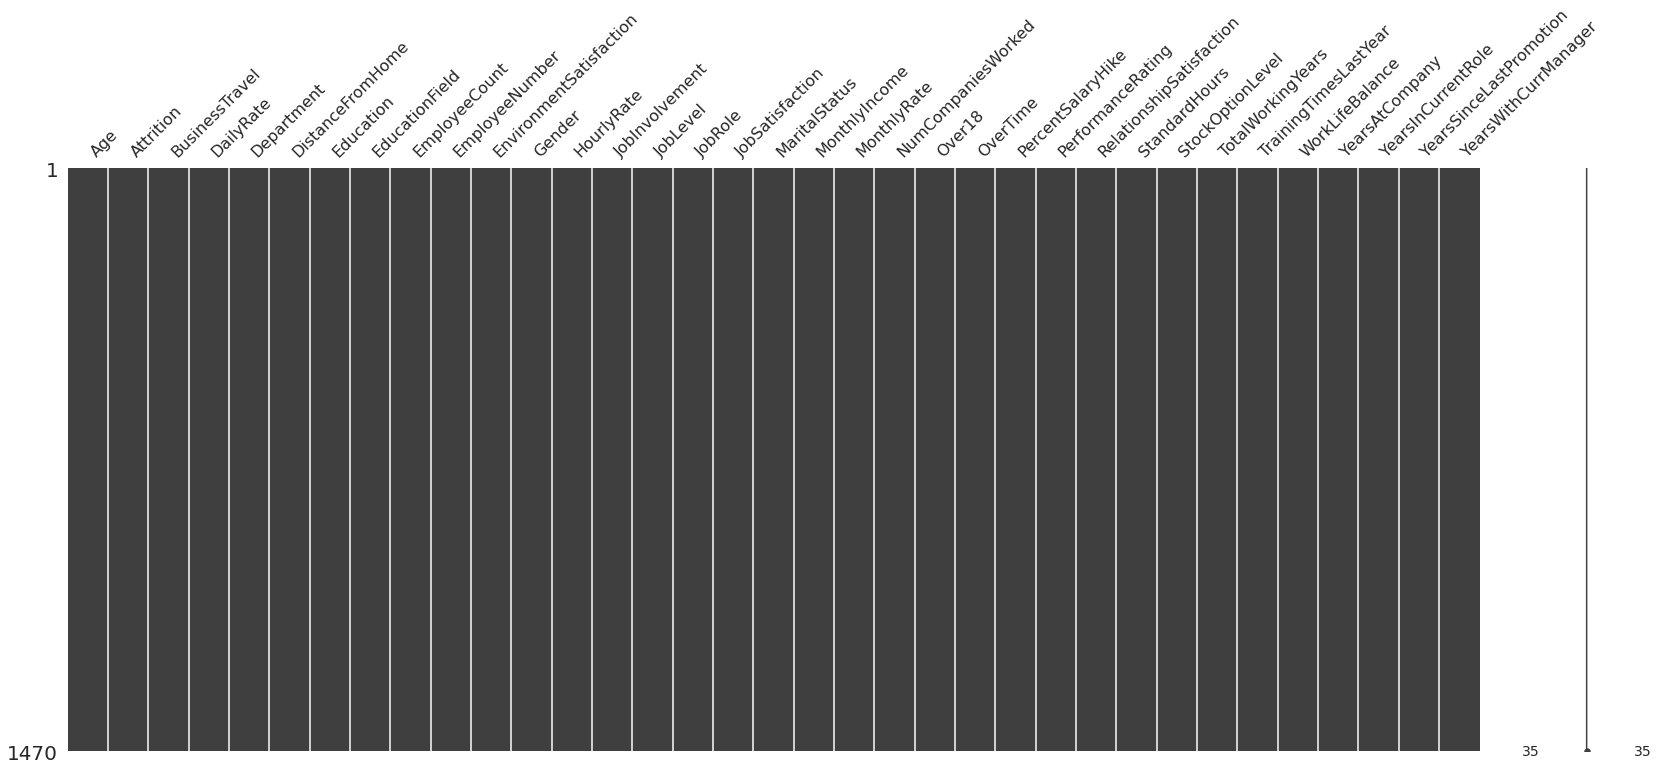

In [13]:
msno.matrix(df) # just to visualize.

## 1.4 ) The Features and the 'Target'

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 1.5 ) Univariate Analysis

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 Let us first analyze the various numeric features. To do this we can actually plot a boxplot showing all the numeric features.

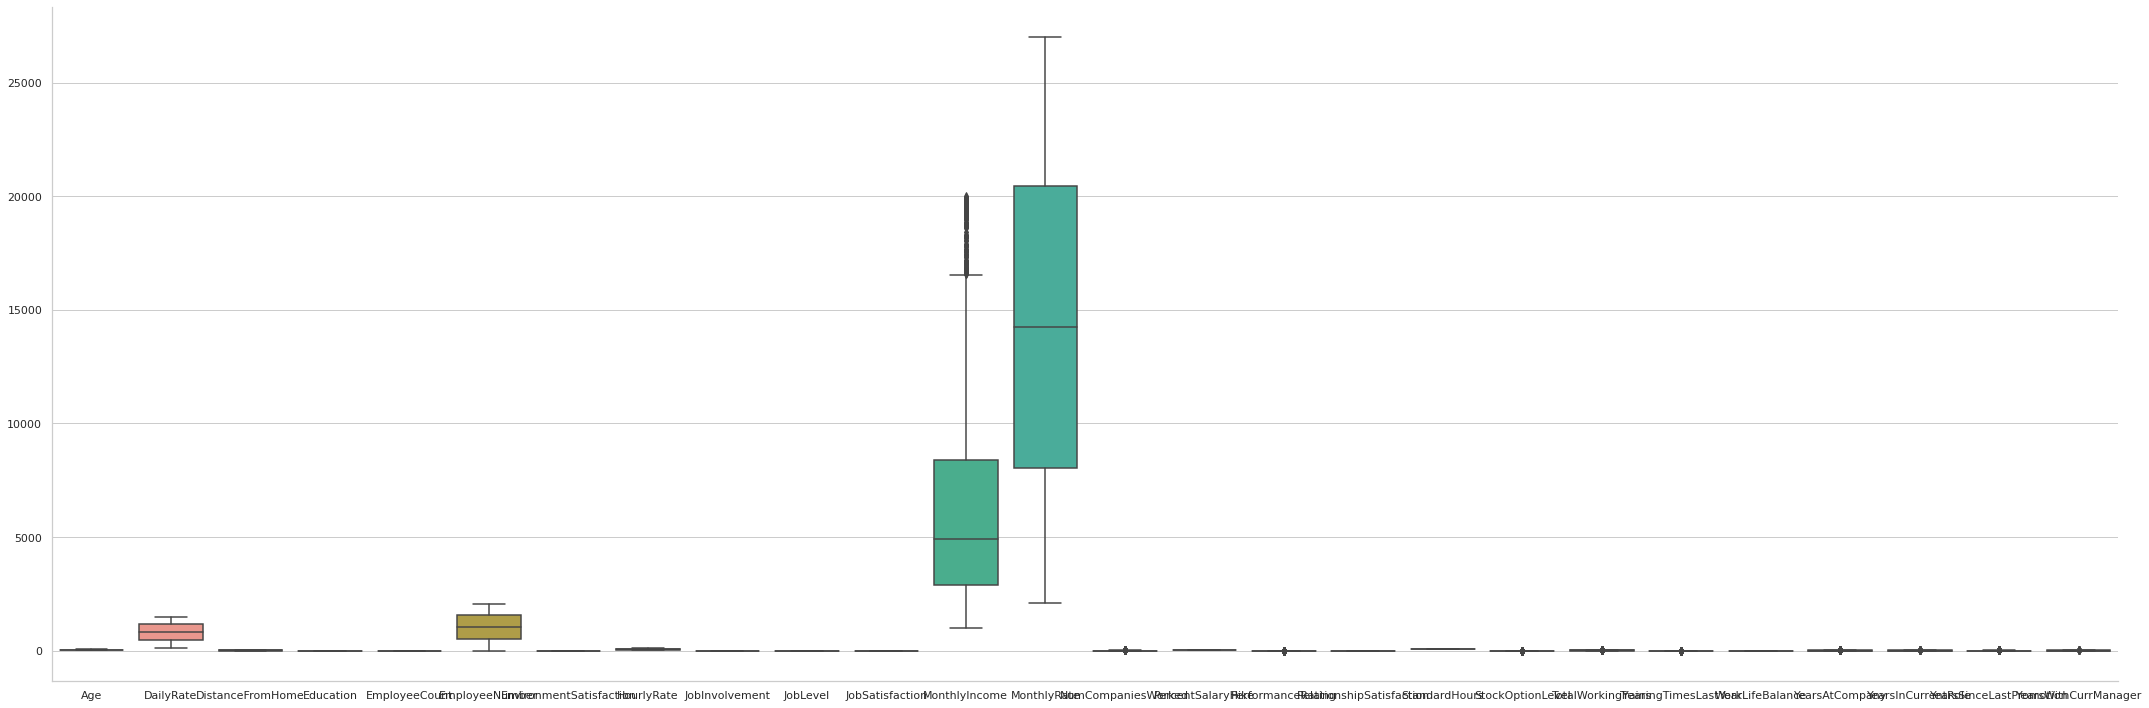

In [17]:
sns.factorplot(data=df,kind='box',size=10,aspect=3)

Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.
 

> We can also plot a kdeplot showing the distribution of the feature. Below I have plotted a kdeplot for the 'Age' feature. Similarly we plot for other numeric features also. Similarly we can also use a distplot from seaborn library.



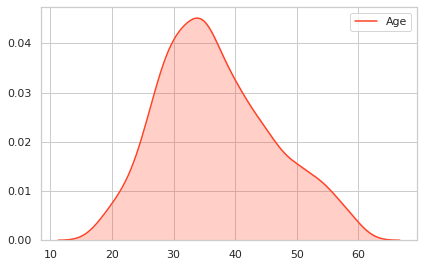

In [34]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

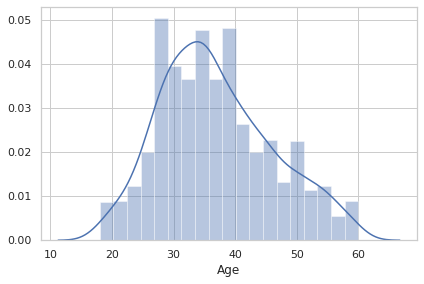

In [19]:
sns.distplot(df['Age'])

Similarly we can do this for all the numerical features. Below I have plotted the subplots for the other features.

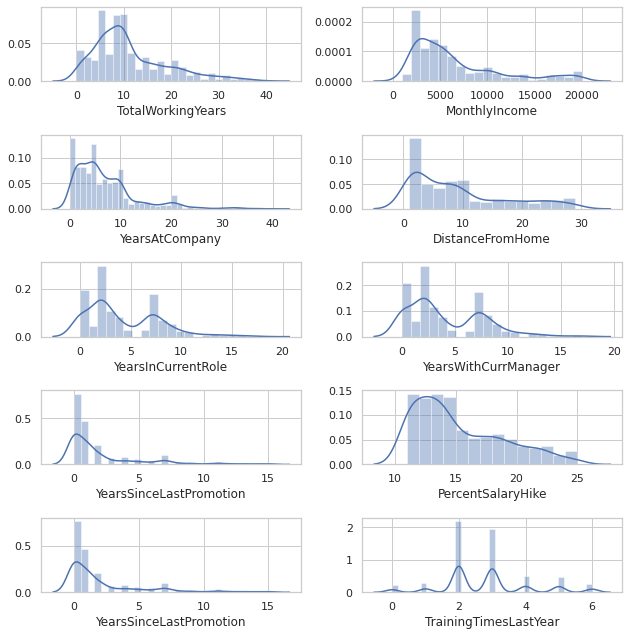

In [20]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features. Note that in these cases the best way is to use a count plot to show the relative count of observations of different categories.

In [0]:
cat_df=df.select_dtypes(include='object')

In [22]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [0]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

I have made a function that accepts the name of a string. In our case this string will be the name of the column or attribute which we want to analyze. The function then plots the countplot for that feature which makes it easier to visualize.

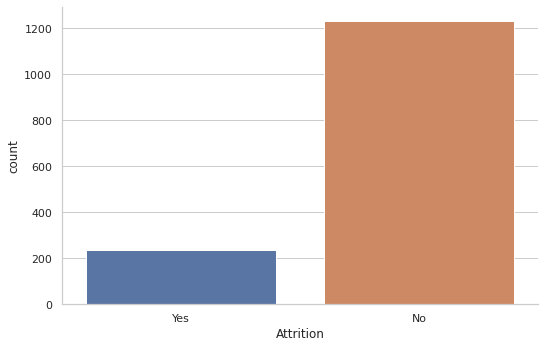

In [24]:
plot_cat('Attrition')   

######  Note that the number of observations belonging to the 'No'  category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. I shall come back to this point later.

Let us now similalry analyze other categorical features.

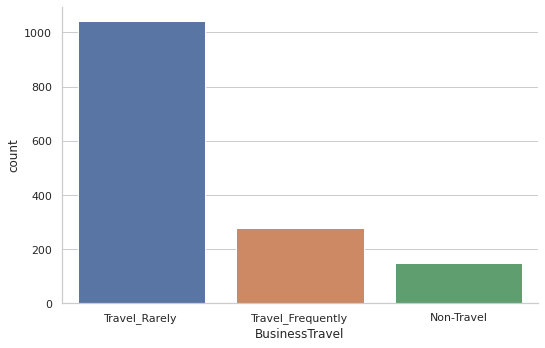

In [26]:
plot_cat('BusinessTravel')   

The above plot clearly shows that most of the people belong to the 'Travel_Rarely' class. This indicates that most of the people did not have a job which asked them for frequent travelling.

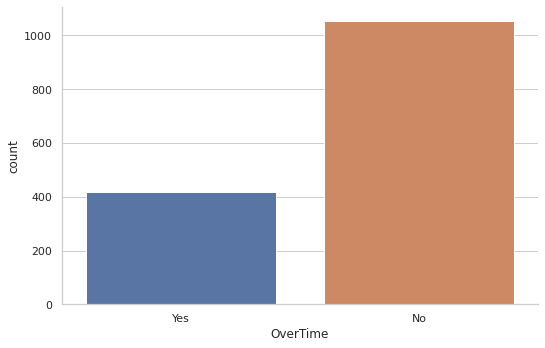

In [27]:
plot_cat('OverTime')

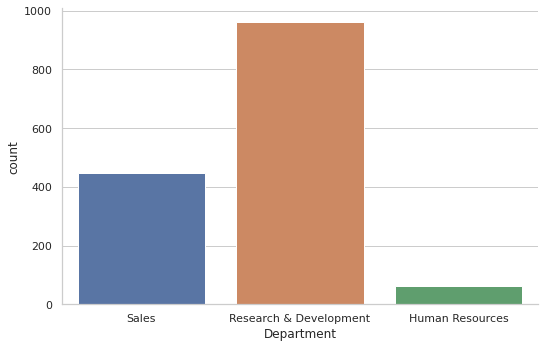

In [28]:
plot_cat('Department')   

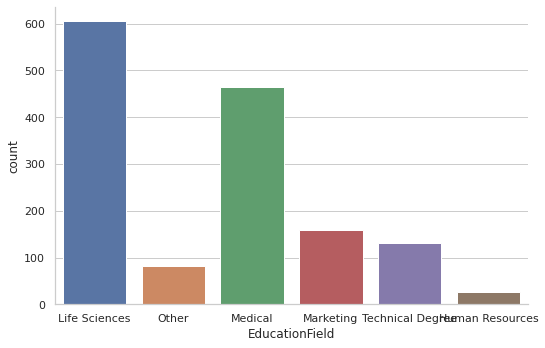

In [29]:
plot_cat('EducationField')

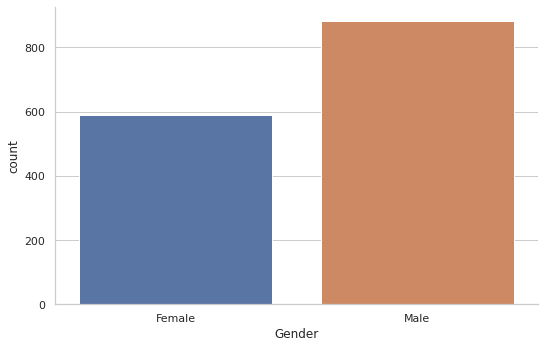

In [30]:
plot_cat('Gender') 

Note that males are presnt in higher number.

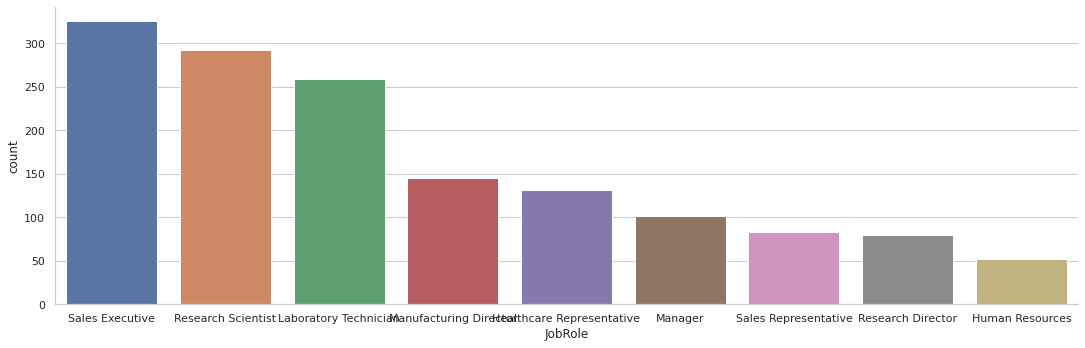

In [31]:
plot_cat('JobRole')   

######  Similarly we can continue for other categorical features. 

 

###### Note that the same function can also be used to better analyze the numeric discrete features like 'Education' ,'JobSatisfaction' etc...  

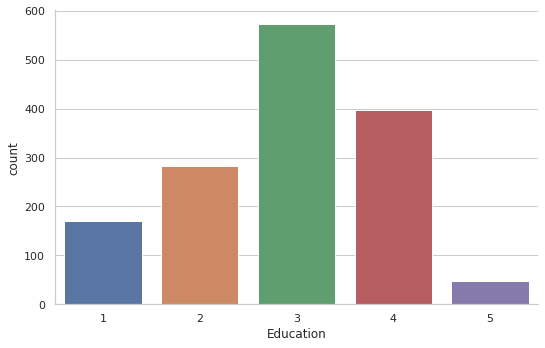

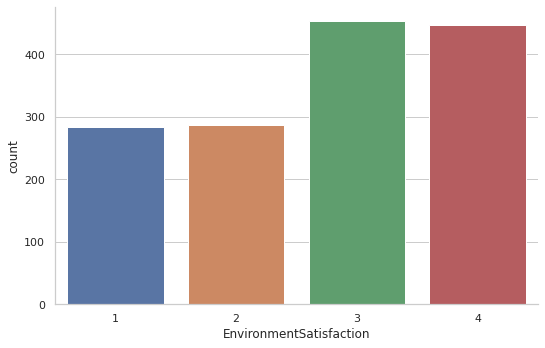

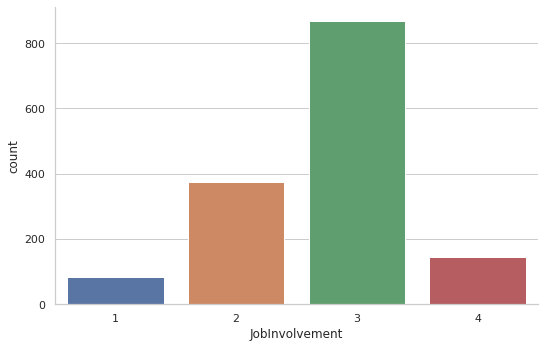

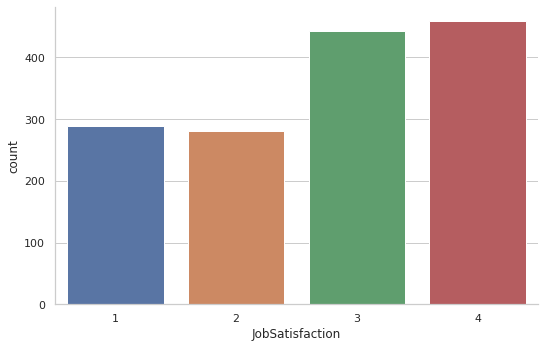

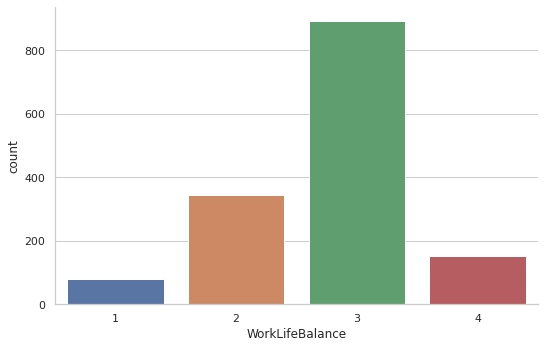

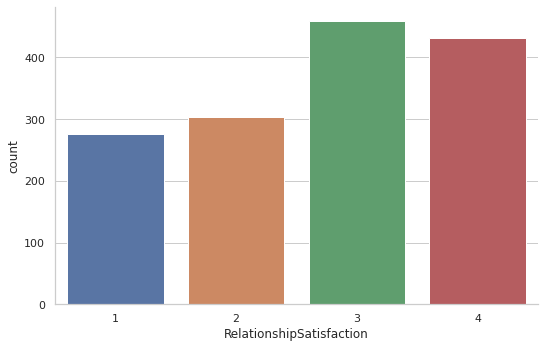

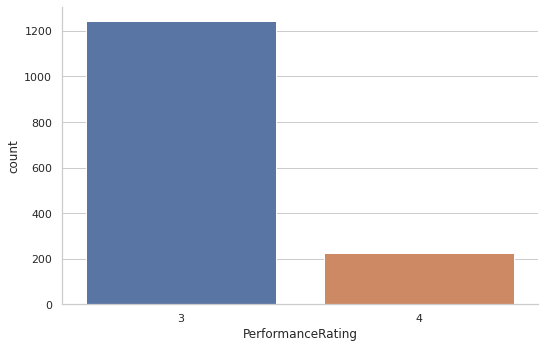

In [32]:
num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
     plot_cat(i)

# similarly we can intrepret these graphs.

## 2 ) Corelation b/w Features

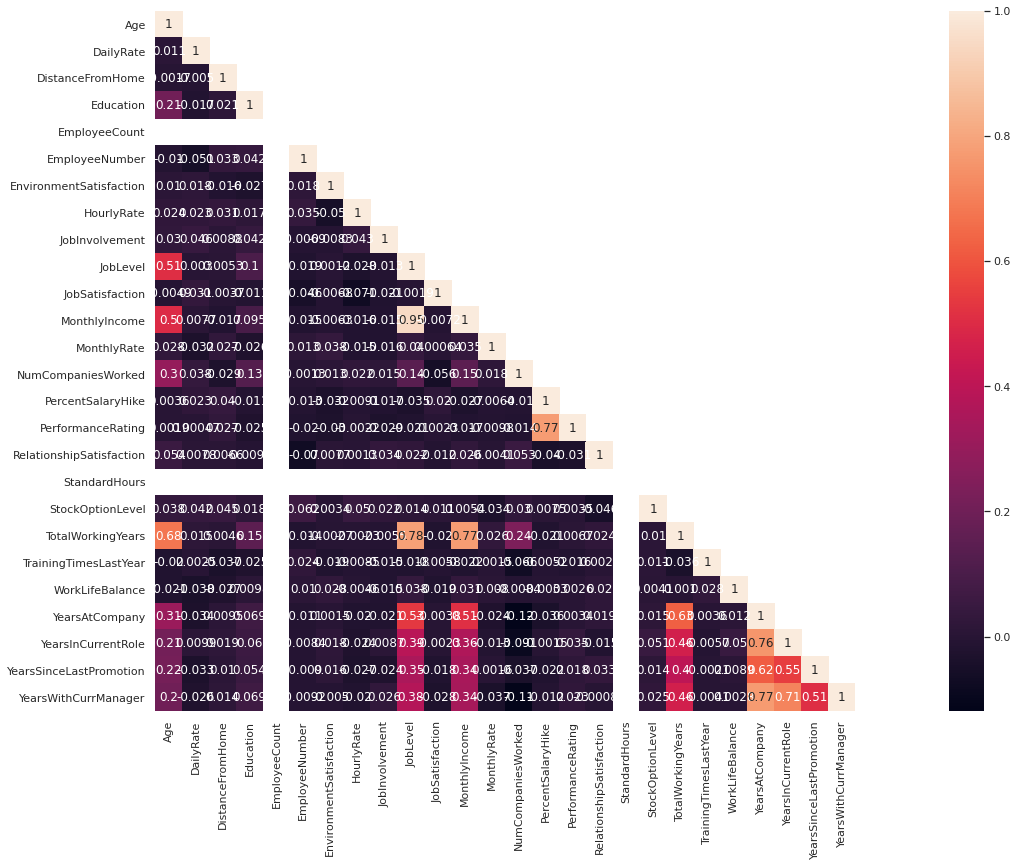

In [33]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

###### BREAKING IT DOWN
Firstly calling .corr() method on a pandas data frame returns a corelation data frame containing the corelation values b/w the various attributes.
now we obtain a numpy array from the corelation data frame using the np.array method.
nextly using the np.tril_indices.from() method we set the values of the lower half of the mask numpy array to False. this is bcoz on passing the mask to heatmap function of the seaborn it plots only those squares whose mask is False. therefore if we don't do this then as the mask is by default True then no square will appear. Hence in a nutshell we obtain a numpy array from the corelation data frame and set the lower values to False so that we can visualise the corelation. In order for a full square just use the [:] operator in mask in place of tril_ind... function.
in next step we get the refernce to the current figure using the gcf() function of the matplotlib library and set the figure size.
in last step we finally pass the necessary parameters to the heatmap function.

DATA=the corelation data frame containing the 'CORELATION' values.

MASK= explained earlier.

vmin,vmax= range of values on side bar

SQUARE= to show each individual unit as a square.

ANNOT- whether to dispaly values on top of square or not. In order to dispaly pass it either True or the cor_mat.

CBAR= whether to view the side bar or not.

###### SOME INFERENCES FROM THE ABOVE HEATMAP

1. Self relation ie of a feature to itself is equal to 1 as expected.

2. JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

3. MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

4. PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

5. Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

6. YearsWithCurrManager is highly related to YearsAtCompany.

7. YearsAtCompany is related to YearsInCurrentRole.

  

Note that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 3 ) Feature Selection

## 3.1 ) Plotting the Features against the 'Target' variable.

####  3.1.1 ) Age

Note that Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

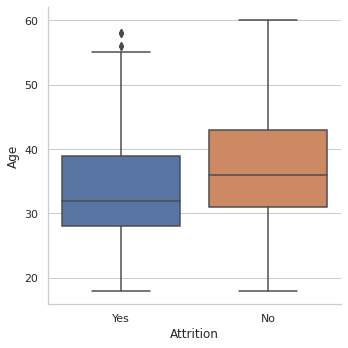

In [36]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

Note that the median as well the maximum age of the peole with 'No' attrition is higher than that of the 'Yes' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

#### 3.1.2 ) Department

Note that both Attrition(Target) as well as the Deaprtment are categorical. In such cases a cross-tabulation is the most reasonable way to analyze the trends; which shows clearly the number of observaftions for each class which makes it easier to analyze the results.

In [37]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

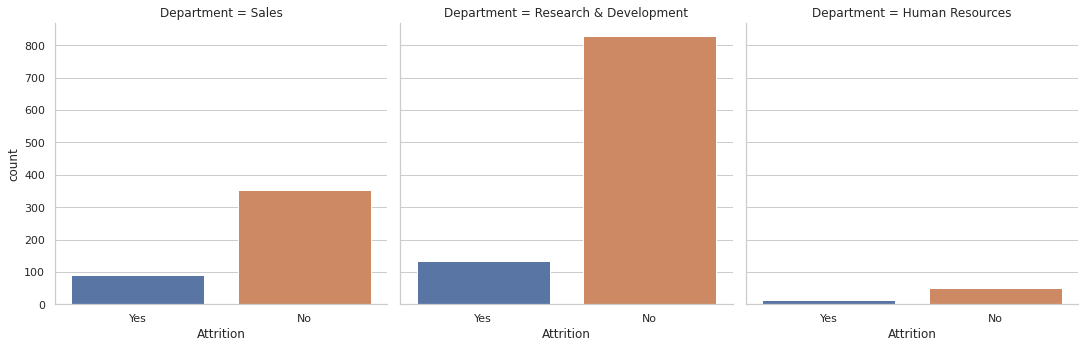

In [38]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [39]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


Note that most of the observations corresspond to 'No' as we saw previously also. About 81 % of the people in HR dont want to leave the organisation and only 19 % want to leave. Similar conclusions can be drawn for other departments too from the above cross-tabulation.

#### 3.1.3 ) Gender

In [40]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


About 85 % of females want to stay in the organisation while only 15 % want to leave the organisation. All in all 83 % of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

#### 3.1.4 ) Job Level

In [41]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.

#### 3.1.5 ) Monthly Income

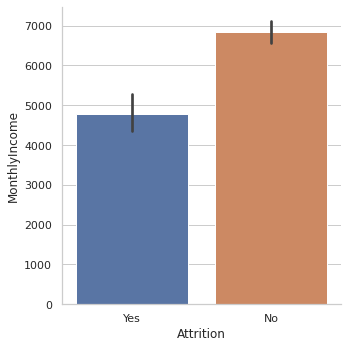

In [43]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

 Note that the average income for 'No' class is quite higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

#### 3.1.6 ) Job Satisfaction

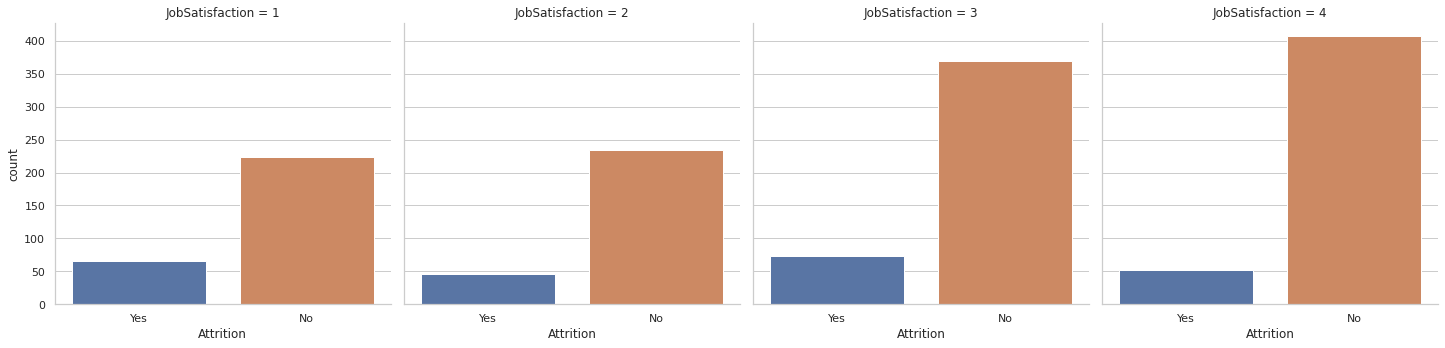

In [44]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [45]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


Note this shows an interesting trend. Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

#### 3.1.7 ) Environment Satisfaction 

In [46]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion.

#### 3.1.8 ) Job Involvement

In [47]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


#### 3.1.9 ) Work Life Balance

In [48]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

#### 3.1.10 ) RelationshipSatisfaction

In [49]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


###### Notice that I have plotted just some of the important features against out 'Target' variable i.e. Attrition in our case. Similarly we can plot other features against the 'Target' variable and analye the trends i.e. how the feature effects the 'Target' variable.

## 3.2 ) Feature Selection

In [0]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

##  4 ) Preparing Dataset

## 4.1 ) Feature Encoding 

I have used the Label Encoder from the scikit library to encode all the categorical features.

In [0]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    


In [52]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [53]:
for col in cat_df.columns:
    transform(col)


['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [54]:
df.head() # just to verify.

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,7,4,2,5993,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,6,2,1,5130,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,2,3,2,2090,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,6,3,1,2909,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,2,2,1,3468,0,12,3,4,6,3,2,2,2,2


## 4.2 ) Feature Scaling.

The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below I have used the StandardScaler to scale the data.

In [0]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].to_numpy()

## 4.3 ) Splitting the data into training and validation sets

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## 5 ) Modelling

## 5.1 ) Handling the Imbalanced dataset

## 5.1.1 ) Oversampling the Minority or Undersampling the Majority Class
 
  

In [0]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

## 5.1.2 ) Using the Right Evaluation Metric

## 5.2 ) Building A Model & Making Predictions

In [0]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))  

In [65]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.828804,0.458333,0.372881,0.644369
1,RandomForestClassifier,0.864130,0.166667,0.444444,0.665079
2,GradientBoostingClassifier,0.847826,0.291667,0.388889,0.643240


## 5.3 ) Comparing Different Models

In [0]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

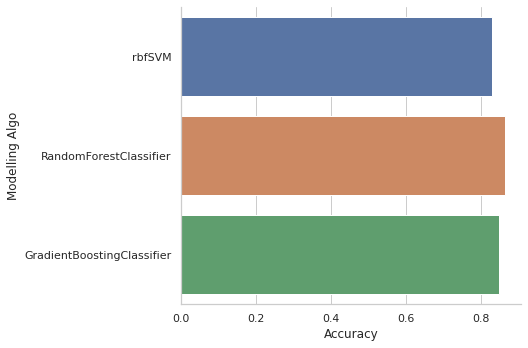

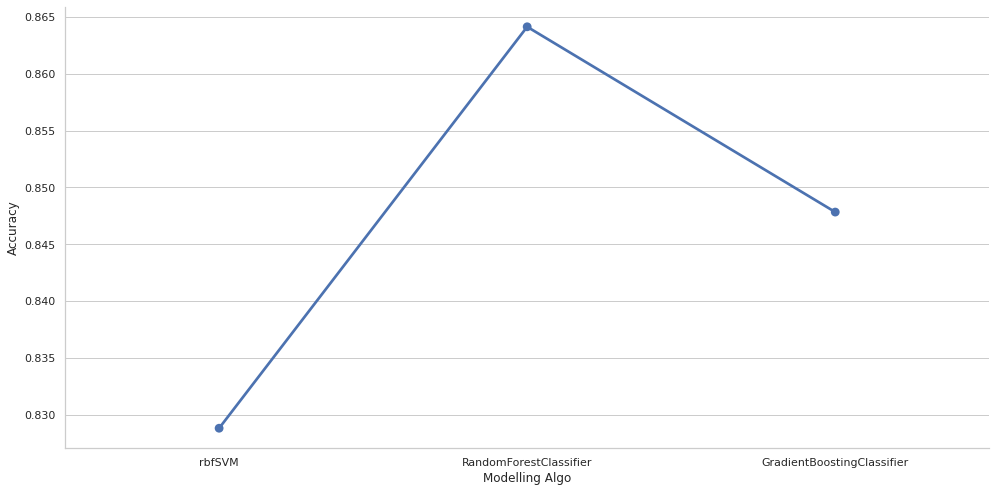

In [67]:
comp_models(met_df,'Accuracy')

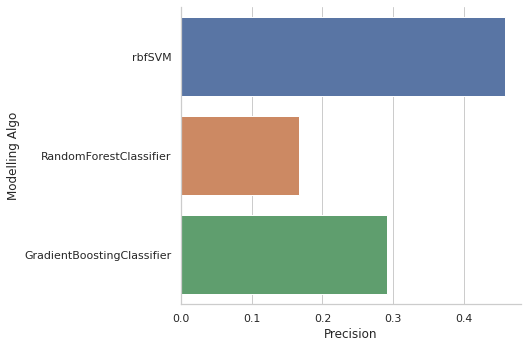

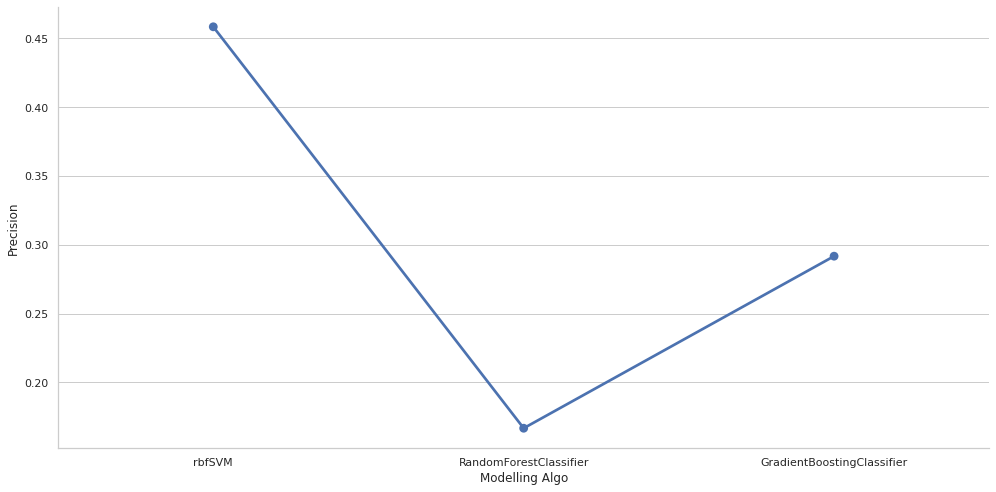

In [68]:
comp_models(met_df,'Precision')

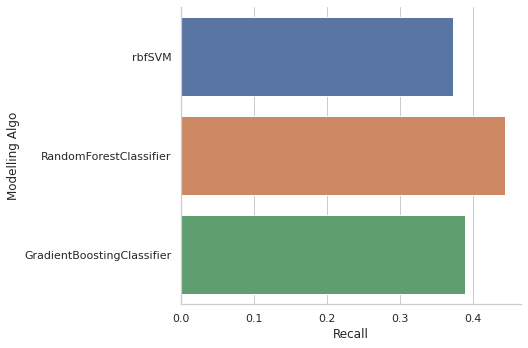

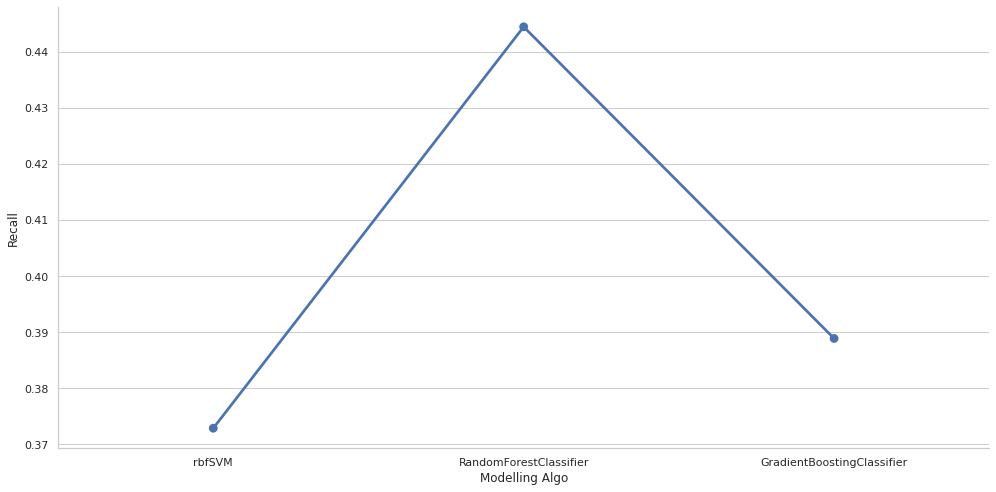

In [69]:
comp_models(met_df,'Recall')

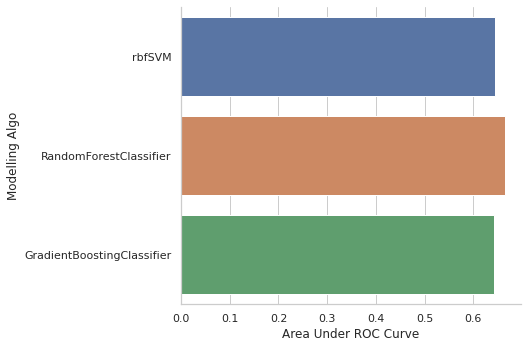

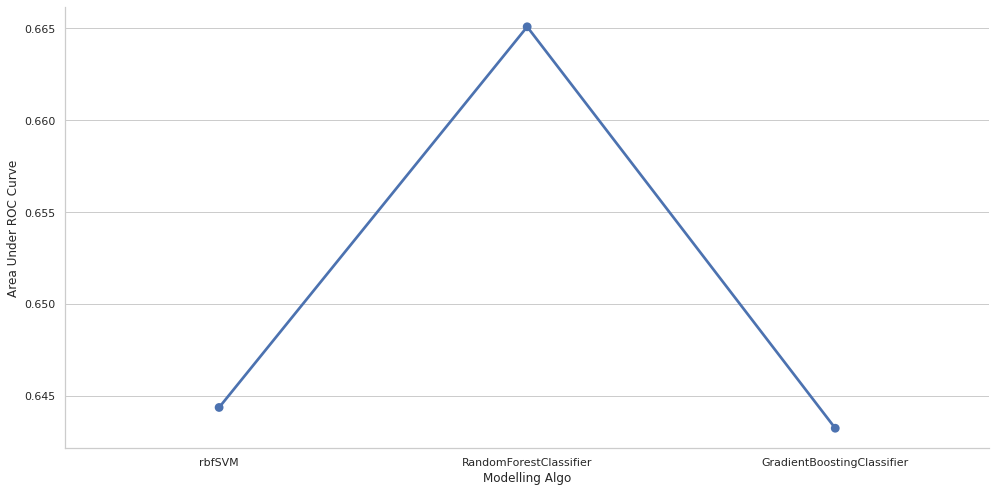

In [70]:
comp_models(met_df,'Area Under ROC Curve')